# Notebook 4 - Naive-Bayes and Logistics Regression in NLP

In this notebook, we will make use of the knowledge gained in the previous one and will go over two fundamental classification algorithms in detail. We will cover:
- Naive-Bayes classifier fundamentals
- NB application in NLP
- smoothing

and

- Logistic Regression fundamentals
- LR loss function & regularization
- LR learning process 

---

## 8. Naive-Bayes Classifier

As stated in the previous notebook, Naive-Bayes is a supervised learning probabilistic classifier. It is based on applying Bayes' probability theorem and using the fact that the occurrence of an event impacts the probability of another event. But how exactly does it work?

### 8.1 NB Fundamentals
The general purpose of classifiers is to *classify* samples from the dataset into 2 or more **classes**. Since we want to classify text, instead of the term *sample* we will use the term **document**. Thus, classifiers' task is to take an input document *d* and out of all possible classes, return a class *c*, to which the document *d* belongs.

Now, since NB is the probabilistic classifier, its role would be to **maximize the probability** of the predicted class c given the input document d.
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq1.png" alt="equation" width="300"/></div>

The intuition of Bayesian classification is to use **Bayes’ rule** to transform the equation above into their probabilities that have some useful properties.
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq2.png" alt="equation" width="300"/></div>

We then substitute the first equation into the second one to get:
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq3.png" alt="equation" width="400"/></div>

We can conveniently simplify the above equation by dropping the denominator *P(d)*. This is possible because we will be computing *P(d|c)P(c) / P(d)* for each possible class, but *P(d)* does not change for each class; we are always asking the most likely class for the same article *d*, which must have the same probability *P(d)*. Thus, we can choose the class that maximizes the simpler formula

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq4.png" alt="equation" width="400"/></div>

Okay, but how do we represent a document *d*? We can represent a document as a set of **features** `d = (f1, f2, f3 ... fn)`. One way to define these features is to use the Bag-of-words model introduced in Notebook 2. After constructing the BOW of the complete dataset, we will be able to express each document as a vector of word counts. Thus, we can treat each vector value associated with a different word as a separate feature giving us information on the words (and optionally their counts) used in the document. Here we also introduce the first of two **simplifying assumptions**: since we use BOW, the **word order doesn't matter**. We don't care about the position of a word in a document.
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq5.png" alt="equation" width="400"/></div>

However, calculating `P(f1, f2, f3 ... fn | c)` requires computing all possible combinations of features (if BOW uses sum pooling than even more!). We need another simplifying assumption called the **naive Bayes assumption** - the **conditional independence between features** given the same class. Hence, we can multiply probabilites as follows:
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq6.png" alt="equation" width="400"/></div>

Resulting in a final equation:
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq8.png" alt="equation" width="400"/></div>

### 8.2 NB Training

So how do we train the classifier? How does it learn what is *P(c)* and *P(f|c)*? Starting with the first probability, we can simply use frequencies and derive it from the probability definition: the probability of a class in the dataset is the number of documents of this class divided by the total number of all documents. 
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq7.png" alt="equation" width="200"/></div>

Learning the probability of features given a class *P(f<sub>i</sub>|c)* isn't more complicated. We assume a feature is just the existence of a word in the document’s bag of words (set of the vocabulary *V*), and so we’ll want *P(w|c)*, which we compute as **fraction of times the word w<sub>i</sub> appears among all words in all documents of topic c**.
<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq9.png" alt="equation" width="400"/></div>

Let's consider the following example:

This is our training data:

| **Text** | **Labels** |
|----------|-----------|
|"What a great match" | sports |
|"The election results will be out tomorrow"| not sports |
|"The match was very boring"| sports |
|"It was a close election"| not sports |

To make the example easier to follow, let’s assume we applied some pre-processing to the sentences and removed stopwords. The resulting sentences are:

| **Text** | **Labels** |
|----------|------------|
|"great match"|  sports |
|"election results tomorrow"| not sports |
|"match boring"| sports |
|"close election"| not sports |

In our small corpus, we have 2 classes each having 2 senteces. Hence, the probability of each class is:

        P("sports") = 2/4 = 0.5
        P("not sports") = 2/4 = 0.5

Total unique features (words) for "sports": 3
Total unique features (words) for "not sports": 4

Let's say we want to assign a class to the following sentence "that was a very close, great match". After stop word removal it is "**close great match**". Now we need to perform some calculations:

1. Likelihood P("close great match"|sports) = P("close"|sports) * P("great"|sports) * P("match"|sports)
2. Likelihood P("close great match"|not sports) = P("close"|not sports) * P("great"|not sports) * P("match"|not sports)

| word | P(word\|sports) | P(word\|not sports)|
|------|----------------|-------------------|
| close | 0/3 | 1/4 |
| great | 1/3| 0/4|
| match | 2/3| 0/4|

We suspect that the correct class is "sport", right? Let's see what happens with the likelihood:
P("close great match"|sports) = 0/3 * 1/3 * 2/3
P("close great match"|sports) = 0

Oops... This example shows a very common situation - there were no training documents classified as "sports" containing the word "close". As a result, P("close"|"sports") results in a painful zero, which also makes the product of probabilities equals 0. We can solve this issue using **smoothing**.

### 8.3 NB Smoothing & Unknown words


#### Laplace smoothing

Smoothing is used to avoid a situation that the classifier assigns zero probability to the whole document (as we can see above). This happens when a classifier sees a word, which IS present in the vocabulary (perhaps in a document of a different class), but it wasn't used in the given context. The intuition behind the smoothing is that we don't want the classifier to assign zero probabilities to previously unseen events - the fact that something wasn't present in the training data, doesn't guarantee that it is impossible.

There are many smoothing algorithms but the simplest one is called **Laplace smoothing** or **Add-one smoothing**. The part of the classification algorithm which causes a problem is the probability of a feature given a class *P(f<sub>i</sub>|c)*, which we interpret as the **fraction of times the word w<sub>i</sub> appears among all words in all documents of topic c**. If the numerator is equal to 0, the whole probability is also equal to 0. Laplace smoothing adds 1 to each count resulting in a new formula for the probability. Note that since we artificially increment the number of occurrences of each word in the numerator and denominator, we add the size of the vocabulary |V| to the denominator. This results in the equation:

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq10.png" alt="equation" width="600"/></div>

#### Add-k smoothing

Add-one smoothing is not the only solution, and very often not the best one. Remember, that the probability mass is finite, which means that if we add some probability to one event, we have to remove it (preferably uniformly) from other events. Adding 1 to each word count, sometimes results in moving too much probability mass from rarely seen to totally unseen events. How can we deal with this situation? Well, the simplest solution is to add a smaller number than 1 to each word count (we don't associate this value with the word count anymore). 

This smoothing is called **Add-k smoothing** since it adds **k** to each word count. This, however, requires estimating what is the best value for **k**. It can be very different for different datasets and applications, so it should be adjusted to the problem.

#### Unseen words

How about previously unseen words in none of the contexts (classes)? For example what happens if we try to test the classifier above on a document "*close funny match*"? Well, since we use the bag-of-words model, we have already seen (in Notebook 2) that this issue is unsolvable in a simple way because we would have to modify all one-hot vectors. The only reasonable solution, in this case, is to **remove all previously unseen words**. Because of this, NB classifiers need rather big training datasets to perform well.

### 8.4 Completed NB example & Implementation

Ok, so let's complete our example using the Laplace smoothing.

The size of our vocabulary |V| = 7, so we will add it to all denominators.

| word | P(word\|sports) | P(word\|not sports)|
|------|----------------|-------------------|
| close | 1/10 | 2/11 |
| great | 2/10| 1/11|
| match | 3/10| 1/11|

P("close great match"|sports) = 1/10 * 2/10 * 3/10 = 0.006
P("close great match"|not sports) = 2/11 * 1/11 * 1/11 = 0.0015

Now, we have to multiply each probability by the probability of a class (posterior = likelihood * prior), which results in:
P("close great match"|sports)*P(sports) = 0.006 * 0.5 = 0.003
P("close great match"|not sports)*P(not sports) = 0.0015 * 0.5 = 0.00075

Thus, there is a higher probability that the test document is indeed about sports and this would be the decision of the NB classifier.

Now, let's implement the same example using `Python` and `scikit-learn`! Firstly let's create a training set and a test document.

In [1]:
# 1 - sports, 0 - not sports
training_corpus = ["What a great match",
          "The election results will be out tomorrow",
          "The match was very boring",
          "It was a close election",
          ]
training_labels = [1, 0, 1, 0]

test_doc = "that was a very close, great match"

Now, we need to preprocess and vectorize documents to extract features (words).

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

from sklearn.feature_extraction.text import CountVectorizer

# Instantiate countvectorizer. You can sepcify what kind of preprocessing will be done by the CountVectorizer
# In this case we want all text in lowercase, remove stopwords, keep only alphanumeric characters.
count_vector = CountVectorizer(lowercase=True, stop_words='english', token_pattern='\w+')

# Fit training data
training_data = count_vector.fit_transform(training_corpus)
# Let's inspect vectors
print(count_vector.get_feature_names())
print(training_data.toarray())

# transform test data
test_doc_transform = count_vector.transform([test_doc])

['boring', 'close', 'election', 'great', 'match', 'results', 'tomorrow']
[[0 0 0 1 1 0 0]
 [0 0 1 0 0 1 1]
 [1 0 0 0 1 0 0]
 [0 1 1 0 0 0 0]]


After vectorizing, let's create and train the NB classifier. For numerical data, we have used a Gaussian NB classifier. For the NLP applications, we will use the Multinomial version of this classifier.

In [3]:
# Create the classifier object and fit data. The classifier object is by default created with the Laplace smoothing
naive_bayes = MultinomialNB(alpha=1)  # alpha parameter specifies the k number from the add-k smoothing. 1 is the default value
naive_bayes.fit(training_data, training_labels)

# Make predictions.
predictions = naive_bayes.predict(test_doc_transform)
predictions

array([1])

Result of 1, means the classifier predicts that the test sentence was from the "sport" category. Now, let's try with this one:

In [4]:
test_doc2 = "that was a very close, great election"
test_doc2_transform = count_vector.transform([test_doc2])
predictions = naive_bayes.predict(test_doc2_transform)
predictions

array([0])

In [5]:
# We can also inspect calculated probabilites.
print(naive_bayes.classes_)  # print the order of classes
print(naive_bayes.predict_proba(test_doc_transform))
print(naive_bayes.predict_proba(test_doc2_transform))

[0 1]
[[0.20429777 0.79570223]]
[[0.6979549 0.3020451]]


This was just a simple example to familiarize with the NB classifier. Let's look at a real word scenario!

### 8.5 News classification using NB

We’ll use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport, or tech. Articles have been already made lowercase and cleaned from punctuation.
The goal is to train the classifier to predict what is the class of a given article. Let's start with loading the dataset.

In [6]:
import pandas as pd
#bbc_dataset_file = "https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/datasets/bbc-text.csv"

''' uncomment if you want to run it locally '''
bbc_dataset_file = "./datasets/bbc-text.csv"

bbc_data = pd.read_csv(bbc_dataset_file)
bbc_data = bbc_data[['category', 'text']]
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


To develop a well-working classifier it is important to know the structure of the dataset. Let's see what is the size of each class.

<AxesSubplot:>

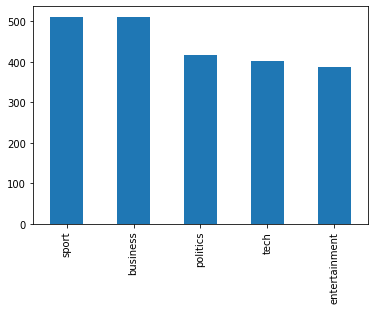

In [7]:
bbc_data['category'].value_counts().plot.bar()

Okay, the dataset seems to be balanced. With this sort of data, imbalance in the dataset wouldn't be that problematic, but read this article if you are interested in when imbalanced data can become a problem: [https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5)

Now, let's vectorize documents and train the model!

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import (
    train_test_split, StratifiedShuffleSplit,
    cross_val_score)
from sklearn.naive_bayes import MultinomialNB

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vector = CountVectorizer(lowercase=True, stop_words='english', token_pattern='\w+')

#fit training data
training_data = count_vector.fit_transform(X_train)

#transform test data
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)

In [10]:
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))
print('f1: {}'.format(f1_score(y_test, predictions, average='macro')))

accuracy: 0.9752808988764045
f1: 0.9748625696012996


Wow - that’s pretty good. But maybe we were lucky and got an "easy" 20% test set. Let's use cross-validation to exclude that possibility

In [12]:
CV_count_vector = CountVectorizer(lowercase=True, stop_words='english', token_pattern='\w+')

X_whole = CV_count_vector.fit_transform(bbc_data["text"])
# CV in sklearn needs lables in numerical values, so let's use LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data["category"])
scores = cross_val_score(naive_bayes, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=100), scoring='accuracy')  # other scoring metric: f1_macro, f1_micro
# Mean accuracy scoring 
scores.mean()

0.9734831460674158

This looks like a pretty decent score! Let's manually see how it works:

In [13]:
tech_article = X_train[0]
business_article = X_train[1]

In [14]:
tech_article[:100]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital'

In [15]:
business_article[:100]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an'

Let's see what is the predicted class for the `tech_article`

In [16]:
print(naive_bayes.predict(count_vector.transform([tech_article])))

['tech']


In [17]:
# And let's inspect probabilities assigned to all of the classes
dict(zip(naive_bayes.classes_, *naive_bayes.predict_proba(count_vector.transform([tech_article]))))

{'business': 1.364113173456053e-204,
 'entertainment': 1.3830745333420627e-177,
 'politics': 3.9193233372349485e-209,
 'sport': 3.003253362804598e-262,
 'tech': 1.0}

How about the `business_article`?

In [18]:
print(naive_bayes.predict(count_vector.transform([business_article])))

['business']


In [19]:
# And let's inspect probabilities assigned to all of the classes
dict(zip(naive_bayes.classes_, *naive_bayes.predict_proba(count_vector.transform([business_article]))))

{'business': 1.0,
 'entertainment': 1.8608928735341935e-89,
 'politics': 7.83023971567479e-69,
 'sport': 1.7129276449338016e-105,
 'tech': 3.1934048837492243e-86}

## 9. Logistic Regression Classifier

### 9.1 LR Fundamentals


Logistic Regression is the another supervised learning algorithm and probabilistic classifier. This means that it will be also interested in calculating the probability *P(c|d)*:

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq1.png" alt="equation" width="300"/></div>

NB classifier used the Bayes' theorem and additional assumptions to derive another equation from the one above. NB uses the probability of a document as a set of features given a class *P(d|c)*, which was learned from the training dataset. 

Logistic regression does it differently. As a discriminative classifier, it tries to learn differences between classes rather than how class representatives "look like". Thus, it will directly try to learn the probability of a class given a set of features representing a document *P(c|d)*. The key of this algorithm is in determining which features discriminate documents most efficiently, by assigning these features appropriate **weights** (parameters). For example, in the "sports" or "not sports" text classification, the word "football" will probably
have strong positive weight and the word "princess", probably strong negative weight. 

In supervised machine learning, we have input features and sets of labels. To make predictions based on data, we use a function F with some parameters Θ to map features to output labels. To get an optimum mapping from features to labels, we have to minimize the cost function, which works by comparing how closely the output Ŷ is to the true labels Y from the training data. Learning takes place by updating the parameters and repeating the process until the cost is minimized.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/sup_learning.jpeg" alt="equation" width="600"/></div>

Parts of the Logistic Regression algorithm:
1. Feature representation - in our case using one-hot vectors, but in general, using **word embeddings** (Notebook 5)
2. A classification function that gives the estimated class using *P(c|d)* - we will use two most popular ones - **sigmoid** (binomial LR) and **softmax** (multinomial LR)
3. The cost function (or loss function) used for learning, which tells us the difference between the estimated class ĉ and the true class c. We will use **cross-entropy loss function**
4. An algorithm for optimizing the classifier by adjusting parameters and consequently minimizing the cost function. One of them is the **Stochastic Gradient Decent**

Since we represent features using a vector `x=[x`<sub>`1`</sub>`, x`<sub>`2`</sub>`, x`<sub>`3`</sub>` ... x`<sub>`n`</sub>`]` and we need to associate some weights with each of these features, we can also represent these weights using a **weights vector** `w=[w`<sub>`1`</sub>`, w`<sub>`2`</sub>`, w`<sub>`3`</sub>` ... w`<sub>`n`</sub>`]`. Then, we can calculate the score for the test document by multiplying each feature with the associated weight and adding all results together. There is also another parameter - the **bias term** `b`, which is added to the sum.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq11.png" alt="equation" width="300"/></div>

In other words, we want the sum of the **dot product** of the features and weights vectors and the bias term:

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq12.png" alt="equation" width="300"/></div>

But how do we map this score to the probability, since the score can be any real number from −∞ to ∞? We will use a **sigmoid function** *σ(z)*, which is also called the logistic function.

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq13.png" alt="equation" width="700"/></div>

As you can see, it is symmetric with respect to the point (0, 0.5) and it maps all real numbers to the range (0,1) - this is exactly what we need! For two classes (binomial logistic regression), class 0 and class 1, we have probabilities as follows:

<div style="text-align:center"><img src="https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/nb_resources/eq14.png" alt="equation" width="400"/></div>

#### Loss function

Okay, so how does the classifier learn the correct weights vector and the bias? It starts with some arbitrary values, which are then used to classify a training set. Each result is compared with the true label using the loss functions, in our case with the cross-entropy loss function. This function tells the classifier what is the difference between the classifier output and the true label. Taking into account loss, the classifier needs to adjust its parameters *θ* (in our case *θ = w, b*) to minimize the loss. This is equivalent to finding parameters *θ*, that minimize the loss function (find its minimum). 

#### Minimizing the loss

Since the loss function is parameterized by weights and the bias term, finding its minimum is a multidimensional task. The popular algorithm for finding the minimum of a function is the Stochastic Gradient Decent (SGD). Gradient Descent is a method that finds a minimum of a function by figuring out in which direction (in the space of the parameters *θ*) the function’s slope is rising the most steeply, and moving in the opposite direction. The intuition is that if you are hiking in a canyon and trying to descend most quickly down to the river at the bottom, you might look around yourself 360 degrees, find the direction where the ground is sloping the steepest, and walk downhill in that direction.

I strongly encourage you to read [this chapter](https://web.stanford.edu/~jurafsky/slp3/5.pdf) of the book “Speech and Language Processing” by Daniel Jurafsky and James H. Martin as it explains the idea behind SGD and Logistic Regression very well.

#### Regularization

There is still at least one more thing to consider. What happens if we choose weights that make the model perfectly match the training data? This may result in overfitting - the same model may have much worse performance on the testing data. To avoid it we can add a special **regularization term**, which penalizes large weights. The reason for penalizing large weights is that they cause some features (present only in the training set) to be much more important than others. When a model is exposed to unseen data, this may block out other crucial features and their combinations.

Having all this knowledge, let's try to implement a Logistic Regression classifier on the BBC dataset.

### 9.2 LR example using the bbc news dataset

In [20]:
bbc_data = pd.read_csv(bbc_dataset_file)
bbc_data = bbc_data[['category', 'text']]
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [21]:
from sklearn.linear_model import LogisticRegression

Let's vectorize words, split dataset into training and testing and fit the classifier!

In [22]:
#instantiate countvectorizer 
count_vector = CountVectorizer(lowercase=True, stop_words='english', token_pattern='\w+')
le = LabelEncoder()


X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

# remember to fit count vectorizer on the training data, because only these words are present in the training set. 
# Adding words from the testing set makes this set no longer "unseen" to the model
X_train_trans = count_vector.fit_transform(X_train)
y_train_trans = le.fit_transform(y_train)

# Logistic Regression classifier has several parameters including the penalty for big weights (l1, l2) and the method of finding the loss function minimum (solver)
lr = LogisticRegression(random_state=0, penalty='l2', solver='lbfgs', verbose=0)
lr.fit(X_train_trans, y_train_trans)

LogisticRegression(random_state=0)

In [23]:
X_test_trans = count_vector.transform(X_test)
y_test_trans = le.transform(y_test)

predictions = lr.predict(X_test_trans)
accuracy_score(y_test_trans, predictions)

0.9617977528089887

Again, let's use CV to exclude "lucky" test set. It may take more time than usual.

In [24]:
# CV in sklearn needs lables in numerical values, so let's use LabelEncoder
CV_count_vector = CountVectorizer(lowercase=True, stop_words='english', token_pattern='\w+')
X_whole = CV_count_vector.fit_transform(bbc_data["text"])
y_whole = le.transform(bbc_data["category"])

scores = cross_val_score(lr, X_whole, y_whole, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0), scoring='accuracy')  # other scoring metric: f1_macro, f1_micro
# Mean accuracy scoring 
scores.mean()

0.969438202247191

Let's see a simple example of how the classifier performs on a tech article.

In [25]:
tech_article = X_train[0]
tech_article[:100]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital'

In [26]:
dict(zip(le.inverse_transform(lr.classes_), *lr.predict_proba(count_vector.transform([tech_article]))))

{'business': 2.212367750931827e-08,
 'entertainment': 0.00014193231439807016,
 'politics': 6.029509334365114e-07,
 'sport': 3.55322773201083e-09,
 'tech': 0.9998574390577633}

One interesting thing we can do is to inspect which words have the most positive and most negative weights (are influencing the classification most). The `lr.coef_` gives us weights trained by the classifier for each class.

In [27]:
print(lr.coef_)
print("Shape: {}".format(np.shape(lr.coef_)))

[[ 1.77008159e-02 -4.31583235e-03  4.22547508e-02 ... -5.44355983e-04
  -2.10171741e-08 -2.09024382e-04]
 [-6.02582168e-02  6.18273670e-03  6.68598754e-02 ...  6.64317897e-03
  -1.03485585e-05  2.50823664e-03]
 [-2.50935813e-02 -6.19608971e-05  2.08950764e-02 ... -8.69366923e-04
  -5.50843459e-07 -4.68280347e-05]
 [ 1.05872546e-01 -5.34020718e-05 -1.16065069e-01 ... -4.88809180e-03
   1.25195121e-05 -1.61260505e-03]
 [-3.82215641e-02 -1.75154138e-03 -1.39446338e-02 ... -3.41364259e-04
  -1.59909299e-06 -6.39779168e-04]]
Shape: (5, 25597)


As you can see, each class has separate weights (there are 5 classes and 5 dimensions), as this is a Multinomial Logistic Regression classification task. Let's see the top-weighted words for each class. Firstly, we need to associate classes names with values, then we can see which words discriminate classes in the best way.

In [28]:
# Classes names are mapped to numbers (we used the label encoder for this, so let's see what is the order)
class_names = le.inverse_transform(lr.classes_)
print(class_names)
print(lr.classes_)

['business' 'entertainment' 'politics' 'sport' 'tech']
[0 1 2 3 4]


In [29]:
weights_dict = {}
weights_dict["feature"] = count_vector.get_feature_names()
for class_num in range(5):
    weights_dict[class_names[class_num]] = lr.coef_[class_num]

bbc_features_weights = pd.DataFrame(weights_dict)

In [30]:
bbc_features_weights.sort_values(by="business", ascending=False)

,feature,business,entertainment,politics,sport,tech
9518,firm,0.571839,-0.288587,-0.082418,-0.181756,-0.019078
8757,euros,0.465909,-0.152402,-0.064496,-0.149050,-0.099961
20804,shares,0.384076,-0.132941,-0.037758,-0.124302,-0.089076
2955,bank,0.360531,-0.113132,-0.065330,-0.109061,-0.073009
18146,profits,0.340768,-0.084489,-0.039651,-0.103981,-0.112647
...,...,...,...,...,...,...
4001,britain,-0.201828,-0.062542,0.246412,0.072051,-0.054093
25144,win,-0.204785,-0.071892,-0.033466,0.399809,-0.089665
16365,old,-0.213929,0.015799,-0.030318,0.211419,0.017030
9433,film,-0.249245,0.567778,-0.145280,-0.196645,0.023392


In [31]:
bbc_features_weights.sort_values(by="entertainment", ascending=False)

,feature,business,entertainment,politics,sport,tech
225,163,-0.448092,0.645419,-0.027848,-0.100412,-0.069067
9433,film,-0.249245,0.567778,-0.145280,-0.196645,0.023392
21128,singer,-0.121295,0.393541,-0.076322,-0.119649,-0.076276
23798,tv,-0.124427,0.353531,-0.144471,-0.165795,0.081160
15650,music,-0.201312,0.352136,-0.126266,-0.192007,0.167450
...,...,...,...,...,...,...
22913,technology,-0.201781,-0.176289,-0.056054,-0.117837,0.551962
10150,games,-0.088289,-0.196881,-0.022945,0.010725,0.297390
10139,game,-0.188651,-0.220367,-0.061090,0.196689,0.273420
10599,government,0.195998,-0.244397,0.349831,-0.150857,-0.150576


In [32]:
bbc_features_weights.sort_values(by="politics", ascending=False)

,feature,business,entertainment,politics,sport,tech
16982,party,-0.173311,-0.139301,0.478468,-0.099592,-0.066263
3495,blair,-0.163510,-0.110918,0.384272,-0.045596,-0.064248
10599,government,0.195998,-0.244397,0.349831,-0.150857,-0.150576
13475,labour,-0.091466,-0.108259,0.331888,-0.083972,-0.048192
8242,election,-0.084945,-0.121483,0.325777,-0.067464,-0.051885
...,...,...,...,...,...,...
2921,balls,0.127090,-0.000990,-0.125880,-0.000093,-0.000127
15650,music,-0.201312,0.352136,-0.126266,-0.192007,0.167450
5560,companies,0.215547,-0.036713,-0.133618,-0.086322,0.041106
23798,tv,-0.124427,0.353531,-0.144471,-0.165795,0.081160


In [33]:
bbc_features_weights.sort_values(by="sport", ascending=False)

,feature,business,entertainment,politics,sport,tech
25144,win,-0.204785,-0.071892,-0.033466,0.399809,-0.089665
14700,match,-0.166496,-0.127954,-0.040573,0.396486,-0.061463
22890,team,-0.107919,-0.126025,-0.096541,0.361067,-0.030583
6495,cup,-0.137345,-0.090435,-0.037199,0.336211,-0.071232
12311,injury,-0.122379,-0.078572,-0.049308,0.290245,-0.039987
...,...,...,...,...,...,...
23860,uk,-0.102038,0.116291,0.206630,-0.170610,-0.050274
9518,firm,0.571839,-0.288587,-0.082418,-0.181756,-0.019078
15650,music,-0.201312,0.352136,-0.126266,-0.192007,0.167450
9433,film,-0.249245,0.567778,-0.145280,-0.196645,0.023392


In [34]:
bbc_features_weights.sort_values(by="tech", ascending=False)

,feature,business,entertainment,politics,sport,tech
22913,technology,-0.201781,-0.176289,-0.056054,-0.117837,0.551962
15320,mobile,-0.105172,-0.120836,-0.062559,-0.097270,0.385838
500,233,-0.191574,-0.090254,-0.025219,-0.067974,0.375021
21441,software,-0.153330,-0.084149,-0.084437,-0.044048,0.365964
16410,online,-0.059032,-0.118098,-0.084213,-0.079578,0.340920
...,...,...,...,...,...,...
16490,orange,0.166800,-0.016963,-0.015476,-0.019532,-0.114828
20102,said,-0.003508,0.040237,0.150887,-0.070312,-0.117303
10599,government,0.195998,-0.244397,0.349831,-0.150857,-0.150576
22695,t,-0.107107,0.036718,0.042036,0.187509,-0.159156


### 9.3 Another example!

Now, let's look at a different dataset - fake_job_postings.csv from [kaggle](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction). This file contains 18K job descriptions out of which about 800 are fake. We want the classifier to learn to classify job postings based on their descriptions. Firstly, let's do some preprocessing: Select the data column we want and remove NaN entries.

In [35]:
#fake_jobs_dataset_file = "https://raw.githubusercontent.com/TheRootOf3/ucl-nlp-notebook-series/main/Notebook4/datasets/fake_job_postings.csv"

''' uncomment if you want to run it locally '''
fake_jobs_dataset_file = "./datasets/fake_job_postings.csv"

job_full_df = pd.read_csv(fake_jobs_dataset_file)
job_df = job_full_df[["description", "fraudulent"]]
job_df.head()

,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0


Currently, if the description is real it has a value of 0 in the "fraudulent" column, 1 otherwise. Let's create a separate column in the dataframe with the textual label. 

In [36]:
job_df["label"] = job_df.fraudulent.apply(lambda x: "real" if x == 0 else "fake")

<ipython-input-36-6e95b83e74ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df["label"] = job_df.fraudulent.apply(lambda x: "real" if x == 0 else "fake")


In [37]:
job_df

,description,fraudulent,label
0,"Food52, a fast-growing, James Beard Award-winn...",0,real
1,Organised - Focused - Vibrant - Awesome!Do you...,0,real
2,"Our client, located in Houston, is actively se...",0,real
3,THE COMPANY: ESRI – Environmental Systems Rese...,0,real
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,real
...,...,...,...
17875,Just in case this is the first time you’ve vis...,0,real
17876,The Payroll Accountant will focus primarily on...,0,real
17877,Experienced Project Cost Control Staff Enginee...,0,real
17878,Nemsia Studios is looking for an experienced v...,0,real


In [38]:
job_df.dropna(axis=0, inplace=True)

<ipython-input-38-4f3a79f4cf63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df.dropna(axis=0, inplace=True)


real    17014
fake      865
Name: label, dtype: int64


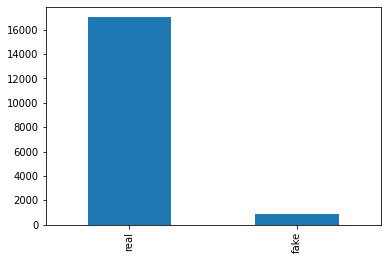

In [39]:
job_df.label.value_counts().plot.bar()
print(job_df.label.value_counts())

As you can see, this dataset is strongly imbalanced. Since the whole dataset is quite small, we will need to add the `stratify` parameter to the `train_test_split()` function.

In [40]:
#instantiate countvectorizer 
count_vector = CountVectorizer(lowercase=True, stop_words='english', token_pattern='\w+')

X_train, X_test, y_train, y_test = train_test_split(
    job_df['description'],
    job_df['label'],
    test_size=0.15,
    random_state=0,
)

X_train_trans = count_vector.fit_transform(X_train)

lr = LogisticRegression(random_state=0, penalty='l2', solver='liblinear', verbose=0)
lr.fit(X_train_trans, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [41]:
X_test_trans = count_vector.transform(X_test)
predictions = lr.predict(X_test_trans)

f1_score(y_test, predictions, pos_label="fake")

0.7619047619047619

76% is not a bad score without preprocessing! Let's explore the confusion table, which will give us an insight into classifier decisions.

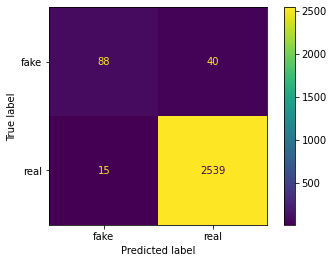

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test_trans, y_test) 
plt.show()

As you can see, the classfifier more often mislabels fake postings with the "real" label (40), than real postings with the "fake" label (15). This is probably due to the high imbalance in the dataset.

Let's check some true and fake job descriptions manually:

In [43]:
job_true = job_df[job_df['label'] == "real"].iloc[0, 0]
job_fake = job_df[job_df['label'] == "fake"].iloc[0, 0]

In [44]:
job_true

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

In [45]:
job_fake

'IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies saf

In [46]:
print(dict(zip(lr.classes_, *lr.predict_proba(count_vector.transform([job_true])))))
print(dict(zip(lr.classes_, *lr.predict_proba(count_vector.transform([job_fake])))))

{'fake': 0.003077564583769843, 'real': 0.9969224354162302}
{'fake': 0.9887470101434559, 'real': 0.011252989856544137}


So which words are crucial for our classifier (have highest positive & negative weights)? This is a binomial LR, so there is only one dimension of weights (negative will be mapped to 0 - true job posting, positives will be mapped to 1 - fake job posting)

In [47]:
job_feature_weights = pd.DataFrame({"feature_name" : count_vector.get_feature_names(), "feature_weight" : lr.coef_[0]})
job_feature_weights.sort_values(by="feature_weight", inplace=True)

In [48]:
# Top words making the posting true and top words making the posting false.
job_feature_weights

,feature_name,feature_weight
41910,rohan,-1.939682
26949,link,-1.529308
87,1000,-1.142240
30055,money,-1.105888
44224,sites,-1.094543
...,...,...
21884,having,0.879387
27071,ll,0.939649
45287,specialist,0.952946
52356,user,0.959319


Interestingly, the word "money" has been registered by the classifier to have a very strong influence (high negative coefficient) on the "fakeness" of the job posting. Based on this, one can conclude that job descriptions containing many words "money" are more likely to be fake - perhaps their authors try to convince potential employees by an unnatural financial approach.

### Feel free to experiment with both datasets, different classifiers and their parameters!